# Regression 03 

# A. Shrinkage (regularization) methods 
# B. Orthogonalization methods

##### Josep Fortiana 2019-10-15

Both families of methods are applicable when there are many predictors, possibly multicollinear. 

Shrinkage, or regularization, methods replace the ordinary least squares condition with penalized least squares, where the penalty term purpose is to diminish the regression coefficients variance (dispersion, unstability). This is the shrinkage in the name.

Orthogonalization methods replace the set of observed predictor variables with a new set of orthogonal variables, derived as linear combinations of the old ones in such a way that the _prediction space,_ that is, the space of columns of $X$, the regression matrix is conserved.

In this laboratory we see two shrinkage methods: Ridge regression and the Lasso, and two orthogonalization methods, Principal Components Regression (PCR) and Partial Least Squares (PLS).

# A1. Ridge regression

##  1. Longley dataset and the `lm.ridge` function in the `MASS`  package

In [1]:
require(MASS)
data(longley)
str(longley)

Loading required package: MASS


'data.frame':	16 obs. of  7 variables:
 $ GNP.deflator: num  83 88.5 88.2 89.5 96.2 ...
 $ GNP         : num  234 259 258 285 329 ...
 $ Unemployed  : num  236 232 368 335 210 ...
 $ Armed.Forces: num  159 146 162 165 310 ...
 $ Population  : num  108 109 110 111 112 ...
 $ Year        : int  1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 ...
 $ Employed    : num  60.3 61.1 60.2 61.2 63.2 ...


In [2]:
longley.ridge.1<-lm.ridge(Employed ~ .,data=longley)
str(longley.ridge.1)

List of 9
 $ coef  : Named num [1:6] 0.157 -3.447 -1.828 -0.696 -0.344 ...
  ..- attr(*, "names")= chr [1:6] "GNP.deflator" "GNP" "Unemployed" "Armed.Forces" ...
 $ scales: Named num [1:6] 10.45 96.24 90.48 67.38 6.74 ...
  ..- attr(*, "names")= chr [1:6] "GNP.deflator" "GNP" "Unemployed" "Armed.Forces" ...
 $ Inter : int 1
 $ lambda: num 0
 $ ym    : num 65.3
 $ xm    : Named num [1:6] 102 388 319 261 117 ...
  ..- attr(*, "names")= chr [1:6] "GNP.deflator" "GNP" "Unemployed" "Armed.Forces" ...
 $ GCV   : Named num 0.00836
  ..- attr(*, "names")= chr "0"
 $ kHKB  : num 0.00428
 $ kLW   : num 0.0323
 - attr(*, "class")= chr "ridgelm"


In [3]:
coefficients(longley.ridge.1)

GNP.deflator           GNP    Unemployed  Armed.Forces 
-3.482259e+03  1.506187e-02 -3.581918e-02 -2.020230e-02 -1.033227e-02 
   Population          Year 
-5.110411e-02  1.829151e+00

In [4]:
longley.ridge.1$scales

GNP.deflator          GNP   Unemployed Armed.Forces   Population         Year 
   10.448877    96.238735    90.479112    67.382126     6.735216     4.609772

In [5]:
print(longley.ridge.1)

               GNP.deflator           GNP    Unemployed  Armed.Forces 
-3.482259e+03  1.506187e-02 -3.581918e-02 -2.020230e-02 -1.033227e-02 
   Population          Year 
-5.110411e-02  1.829151e+00 


In [6]:
summary(longley.ridge.1)

       Length Class  Mode   
coef   6      -none- numeric
scales 6      -none- numeric
Inter  1      -none- numeric
lambda 1      -none- numeric
ym     1      -none- numeric
xm     6      -none- numeric
GCV    1      -none- numeric
kHKB   1      -none- numeric
kLW    1      -none- numeric

`kHKB` is an estimate of the optimal $\lambda$, proposed by Hoerl, Kennard and Baldwin (1975). `kLW` is another estimate, proposed by Lawless, Wang (1976). `GCV` is the Generalized Cross-Validation statistic evaluated for each of the $\lambda$ values being tested.

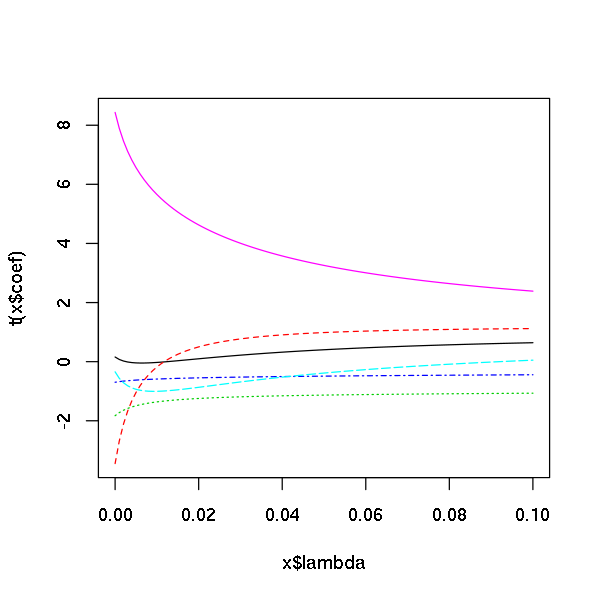

In [7]:
longley.ridge<-lm.ridge(Employed ~ .,data=longley,lambda=seq(0,0.1,by=0.001))
options(repr.plot.width=5, repr.plot.height=5)
plot(longley.ridge)

In [8]:
select(longley.ridge)

modified HKB estimator is 0.004275357 
modified L-W estimator is 0.03229531 
smallest value of GCV  at 0.003 


The `broom` package has functions to gather and visualize the output of `lm.ridge` 

In [9]:
install.packages("broom",dependencies=TRUE,repos="https://cloud.r-project.org")
require(broom)

Installing package into ‘/home/crquispq7.alumnes/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Warning message:
“dependencies ‘brms’, ‘btergm’, ‘car’, ‘lavaan’, ‘rstan’, ‘rstanarm’, ‘statnet.common’, ‘mvtnorm’, ‘vegan’ are not available”also installing the dependencies ‘SQUAREM’, ‘lava’, ‘sys’, ‘prodlim’, ‘askpass’, ‘colorspace’, ‘listenv’, ‘gmp’, ‘polynom’, ‘bibtex’, ‘gbRd’, ‘iterators’, ‘gower’, ‘ipred’, ‘lubridate’, ‘timeDate’, ‘curl’, ‘openssl’, ‘DEoptimR’, ‘labeling’, ‘munsell’, ‘checkmate’, ‘htmlwidgets’, ‘rstudioapi’, ‘rngWELL’, ‘miscTools’, ‘pcaPP’, ‘future’, ‘globals’, ‘xts’, ‘TTR’, ‘sna’, ‘igraph’, ‘RcppParallel’, ‘slackr’, ‘matrixcalc’, ‘pkgconfig’, ‘R6’, ‘tidyselect’, ‘BH’, ‘plogr’, ‘lifecycle’, ‘sandwich’, ‘Formula’, ‘numDeriv’, ‘flexmix’, ‘modeltools’, ‘DBI’, ‘partitions’, ‘Rdpack’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘withr’, ‘rex’, ‘httr’, ‘estimability’, ‘xtable’, ‘robustbase’, ‘trust’, ‘Matrix’, ‘lpSolve’, ‘MASS’, ‘gtable’, ‘lazyeval’, ‘scales’, ‘viri

In [10]:
# tidy(longley.ridge) 
# long output

In [11]:
glance(longley.ridge)

kHKB,kLW,lambdaGCV
<dbl>,<dbl>,<dbl>
0.004275357,0.03229531,0.003


## 2. Acetylene dataset and the  `genridge`  package by Michael Friendly

In [15]:
install.packages("genridge",dependencies=TRUE,repos="https://cloud.r-project.org")
install.packages("car",dependencies=TRUE,repos="https://cloud.r-project.org")
require(genridge)
require(car)

Installing package into ‘/home/crquispq7.alumnes/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Warning message:
“dependency ‘car’ is not available”also installing the dependencies ‘ps’, ‘processx’, ‘callr’, ‘httpuv’, ‘sourcetools’, ‘later’, ‘promises’, ‘fastmap’, ‘miniUI’, ‘webshot’, ‘shiny’, ‘crosstalk’, ‘manipulateWidget’, ‘grpreg’, ‘pls’, ‘ElemStatLearn’, ‘rgl’, ‘bestglm’

Warning message in install.packages("genridge", dependencies = TRUE, repos = "https://cloud.r-project.org"):
“installation of package ‘genridge’ had non-zero exit status”Warning message in install.packages("genridge", dependencies = TRUE, repos = "https://cloud.r-project.org"):
“installation of package ‘rgl’ had non-zero exit status”Installing package into ‘/home/crquispq7.alumnes/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Warning message:
“package ‘car’ is not available (for R version 3.3.3)”Loading required package: genridge
Warning message in library(package, lib.loc = lib.loc, 

The `genridge` package includes the `Acetylene` dataset, with new variable names. We recover the linear model we tried above on these data and then we try a second linear model with quadratic terms. As a matter of fact this dataset originates from the paper: Marquardt, Donald W. and Snee, Ronald D. (1975), _"Ridge Regression in Practice",_ The American Statistician, Vol. 29, No. 1, pp. 3-20. Un this paper the authors start with the model with all six quadratic terms:

$$
 \text{temp}^2,\mskip10mu \text{ratio}^2,\mskip10mu \text{time}^2,\mskip10mu \text{temp}\cdot\text{ratio},\mskip10mu \text{temp}\cdot\text{time},\mskip10mu\text{ratio}\cdot \text{time}.
$$

In [16]:
data(Acetylene)
str(Acetylene)

Warning message in data(Acetylene):
“data set ‘Acetylene’ not found”

ERROR: Error in str(Acetylene): objeto 'Acetylene' no encontrado


In [14]:
# Same model as above, with only linear terms (main effects)
Acetylene.lm1<-lm(yield~temp+ratio+time,data=Acetylene)
summary(Acetylene.lm1)

ERROR: Error in is.data.frame(data): objeto 'Acetylene' no encontrado


In [ ]:
vif(Acetylene.lm1)
X.Acetylene.lm1<-model.matrix(Acetylene.lm1)
kappa(X.Acetylene.lm1)

In [ ]:
# Model from the original paper by Marquardt and Snee
Acetylene.lm2 <- lm(yield ~ temp + ratio + time + I(temp^2)+ I(ratio^2)+ I(time^2) 
                    + temp:ratio+temp:time+ratio:time, data=Acetylene)
summary(Acetylene.lm2)

In [ ]:
vif(Acetylene.lm2)
X.Acetylene.lm2<-model.matrix(Acetylene.lm2)
kappa(X.Acetylene.lm2)

In [ ]:
# A third model, with fewer quadratic terms, used by Michael Friendly to illustrate genridge
Acetylene.lm3 <- lm(yield ~ temp + ratio + time + I(time^2) + temp:time, data=Acetylene)
summary(Acetylene.lm3)

In [ ]:
vif(Acetylene.lm3)
X.Acetylene.lm3<-model.matrix(Acetylene.lm3)
kappa(X.Acetylene.lm3)

In [ ]:
# Ridge regression with the ridge function from genridge
y<- Acetylene[,"yield"]
X0<-X.Acetylene.lm3[,-1]
lambda <- c(0, 0.0005, 0.001, 0.002, 0.005, 0.01)
Acetylene.ridge.1 <- ridge(y, X0, lambda=lambda)
summary(Acetylene.ridge.1)

In [ ]:
traceplot(Acetylene.ridge.1)

In [ ]:
traceplot(Acetylene.ridge.1, X="df")

In [ ]:
pairs(Acetylene.ridge.1, radius=0.2)

## 3. The Fearn dataset

A dataset from the paper by Fearn, T. (1983), _A Misuse of Ridge Regression in the Calibration of a Near Infrared Reflectance Instrument,_ Journal of the Royal Statistical Society. Series C (Applied Statistics), Vol. 32, No. 1(1983), pp. 73-79. This paper, with intended controversial title and contents, found its rebuttal in the paper by Hoerl, Arthur E., Kennard, Robert W.  and Hoerl, Roger W. (1985), _Practical Use of Ridge Regression: A Challenge Met,_ Journal of the Royal Statistical Society. Series C (Applied Statistics), Vol. 34, No. 2(1985), pp. 114-120.

In [ ]:
Fearn.1<-read.table("Fearn.data.1.txt", header=TRUE)
Fearn.2<-read.table("Fearn.data.2.txt", header=TRUE)
str(Fearn.1)
str(Fearn.2)

Adjust the regression `y~x1+x2+x3+x4+x5+x6` with the Fearn dataset and:

1. Ordinary Least Squares (OLS), selecting the best predictors subset

2. Ridge regression

Compare prediction errors. Which one is better?

3. After working through the following section on the lasso, repeat with this method.

NOTE: the data frames `Fearn.1` and `Fearn.2` were used as train and test subsets in the original paper. You may choose to follow this selection or merge both subsets and partition the joint dataset in some other way.

## 4. The `Hitters` dataset in the `ISLR` package 

### Ridge regression following ISLR - Chap 6 - Laboratory 2 - Using the `glmnet` package

[Code from the ISLR website](http://www-bcf.usc.edu/~gareth/ISL/Chapter%206%20Labs.txt)

In [17]:
install.packages("ISLR",dependencies=TRUE,repos="https://cloud.r-project.org")
require(ISLR)
#fix(Hitters)
names(Hitters)
dim(Hitters)
sum(is.na(Hitters$Salary))
Hitters=na.omit(Hitters)
dim(Hitters)
sum(is.na(Hitters))

Installing package into ‘/home/crquispq7.alumnes/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Loading required package: ISLR


[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

[1] 322  20

[1] 59

[1] 263  20

[1] 0

In [18]:
# Prepare x, y for the glmnet syntax
x<-model.matrix(Salary~.,Hitters)[,-1]
y<-Hitters$Salary

In [19]:
install.packages("glmnet",dependencies=TRUE,repos="https://cloud.r-project.org")
require(glmnet)

Installing package into ‘/home/crquispq7.alumnes/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
also installing the dependency ‘lars’

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18



####  A grid of lambda values

In [20]:
# When lambda goes to infinity penalization on coefficients beta01 through beta19 is so high 
# that it pushes all of them down to zero, resulting in a model with no predictors, only the intercept term.
#
# Syntax: 
# alpha=0 is for ridge regression
# alpha=1 is for 'lasso'  regression (cfr. below)
#
grid<-10^seq(10,-2,length=100)
ridge.mod<-glmnet(x,y,alpha=0,lambda=grid)
str(ridge.mod)

List of 12
 $ a0       : Named num [1:100] 536 536 536 536 536 ...
  ..- attr(*, "names")= chr [1:100] "s0" "s1" "s2" "s3" ...
 $ beta     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:1900] 0 1 2 3 4 5 6 7 8 9 ...
  .. ..@ p       : int [1:101] 0 19 38 57 76 95 114 133 152 171 ...
  .. ..@ Dim     : int [1:2] 19 100
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:19] "AtBat" "Hits" "HmRun" "Runs" ...
  .. .. ..$ : chr [1:100] "s0" "s1" "s2" "s3" ...
  .. ..@ x       : num [1:1900] 5.44e-08 1.97e-07 7.96e-07 3.34e-07 3.53e-07 ...
  .. ..@ factors : list()
 $ df       : int [1:100] 19 19 19 19 19 19 19 19 19 19 ...
 $ dim      : int [1:2] 19 100
 $ lambda   : num [1:100] 1.00e+10 7.56e+09 5.72e+09 4.33e+09 3.27e+09 ...
 $ dev.ratio: num [1:100] 2.76e-07 3.64e-07 4.82e-07 6.37e-07 8.42e-07 ...
 $ nulldev  : num 53319113
 $ npasses  : int 2130
 $ jerr     : int 0
 $ offset   : logi FALSE
 $ call     : language glmnet(x = x, y = y, alpha = 0, lambda =

In [21]:
# Compare the beta regression coefficients with a large lambda (small absolute values)
# and with a smaller lambda (larger absolute values).
dim(coef(ridge.mod))
round(ridge.mod$lambda[50],2)
round(coef(ridge.mod)[,50],2)
round(sqrt(sum(coef(ridge.mod)[-1,50]^2)),2)

[1]  20 100

[1] 11497.57

(Intercept)       AtBat        Hits       HmRun        Runs         RBI 
     407.36        0.04        0.14        0.52        0.23        0.24 
      Walks       Years      CAtBat       CHits      CHmRun       CRuns 
       0.29        1.11        0.00        0.01        0.09        0.02 
       CRBI      CWalks     LeagueN   DivisionW     PutOuts     Assists 
       0.02        0.03        0.09       -6.22        0.02        0.00 
     Errors  NewLeagueN 
      -0.02        0.30

[1] 6.36

In [22]:
round(ridge.mod$lambda[60],2)
round(coef(ridge.mod)[,60],2)
round(sqrt(sum(coef(ridge.mod)[-1,60]^2)),2)

[1] 705.48

(Intercept)       AtBat        Hits       HmRun        Runs         RBI 
      54.33        0.11        0.66        1.18        0.94        0.85 
      Walks       Years      CAtBat       CHits      CHmRun       CRuns 
       1.32        2.60        0.01        0.05        0.34        0.09 
       CRBI      CWalks     LeagueN   DivisionW     PutOuts     Assists 
       0.10        0.07       13.68      -54.66        0.12        0.02 
     Errors  NewLeagueN 
      -0.70        8.61

[1] 57.11

In [23]:
# We extract now the regression coefficients with the 'predict' function
round(predict(ridge.mod,s=50,type="coefficients")[1:20,],2)

(Intercept)       AtBat        Hits       HmRun        Runs         RBI 
      48.77       -0.36        1.97       -1.28        1.15        0.80 
      Walks       Years      CAtBat       CHits      CHmRun       CRuns 
       2.72       -6.22        0.01        0.11        0.62        0.22 
       CRBI      CWalks     LeagueN   DivisionW     PutOuts     Assists 
       0.22       -0.15       45.93     -118.20        0.25        0.12 
     Errors  NewLeagueN 
      -3.28       -9.50

In [24]:
# Split randomly the dataset into 'train' and 'test' subsets
set.seed(1)
train<-sample(1:nrow(x), nrow(x)/2)
test<-(-train)
y.test<-y[test]

In [25]:
# Adjust model with the 'train' subset
ridge.mod<-glmnet(x[train,],y[train],alpha=0,lambda=grid, thresh=1e-12)
#
# Then we evaluate prediction error (sum of squares) on the 'test' subset for three lambda values
# (lambda=4, lambda=1.0e10, lambda=0)
#
ridge.pred<-predict(ridge.mod,s=4,newx=x[test,])
round(mean((ridge.pred-y.test)^2),2)

[1] 101036.8

In [26]:
# The model with no predictors (other than the intercept) has always a predicted value equal to the mean of y
# With a large lambda, the model tends to the no predictor one
round(mean((mean(y[train])-y.test)^2),2)
ridge.pred<-predict(ridge.mod,s=1e10,newx=x[test,])
round(mean((ridge.pred-y.test)^2))

[1] 193253.1

[1] 193253

In [27]:
# With lambda equal to zero, the ridge regression model reduces to ordinary least squares
#
## Warning
#
# predict.glmnet with 'exact' computation requires re-entering the original training dataset
#
ridge.pred<-predict(ridge.mod,x=x[train,],y=y[train],s=0,newx=x[test,],exact=TRUE)
round(mean((ridge.pred-y.test)^2),2)

[1] 114783.1

In [28]:
# Same, with no 'exact' computation
#
ridge.pred<-predict(ridge.mod,s=0,newx=x[test,])
round(mean((ridge.pred-y.test)^2),2)

[1] 114723.6

In [29]:
# Compare an ordinary least squares regression with ridge regression with lambda=0 
ols<-lm(Salary~.,data=Hitters, subset=train)
summary(ols)


Call:
lm(formula = Salary ~ ., data = Hitters, subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-802.73 -178.60   -7.03  123.23 1754.21 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 299.42849  146.63692   2.042  0.04352 * 
AtBat        -2.54027    1.08881  -2.333  0.02145 * 
Hits          8.36682    4.18091   2.001  0.04781 * 
HmRun        11.64512   10.83139   1.075  0.28465   
Runs         -9.09923    5.00294  -1.819  0.07164 . 
RBI           2.44105    4.53052   0.539  0.59110   
Walks         9.23440    3.14657   2.935  0.00406 **
Years       -22.93673   20.53294  -1.117  0.26638   
CAtBat       -0.18154    0.23637  -0.768  0.44411   
CHits        -0.11598    1.25713  -0.092  0.92666   
CHmRun       -1.33888    2.56414  -0.522  0.60260   
CRuns         3.32838    1.34538   2.474  0.01488 * 
CRBI          0.07536    1.23878   0.061  0.95160   
CWalks       -1.07841    0.67875  -1.589  0.11494   
LeagueN      59.76065  134.76740

In [30]:
ols.yhat<-predict.lm(ols,newdata=Hitters[test,],type="response")
str(ols.yhat)

 Named num [1:132] 235.7 1201.2 424.7 43.9 212.4 ...
 - attr(*, "names")= chr [1:132] "-Alan Ashby" "-Andre Dawson" "-Alfredo Griffin" "-Argenis Salazar" ...


In [31]:
ols.residuals<-ols.yhat-y.test
round(mean(ols.residuals^2),2)

[1] 114780.6

In [32]:
ridge.yhat<-predict(ridge.mod,x=x[train,],y=y[train],s=0,newx=x[test,],exact=TRUE)
#ridge.yhat<-predict(ridge.mod,s=0,newx=x[test,],type="response")
ridge.residuals<-ridge.yhat-y.test
round(mean(ridge.residuals^2),2)

[1] 114783.1

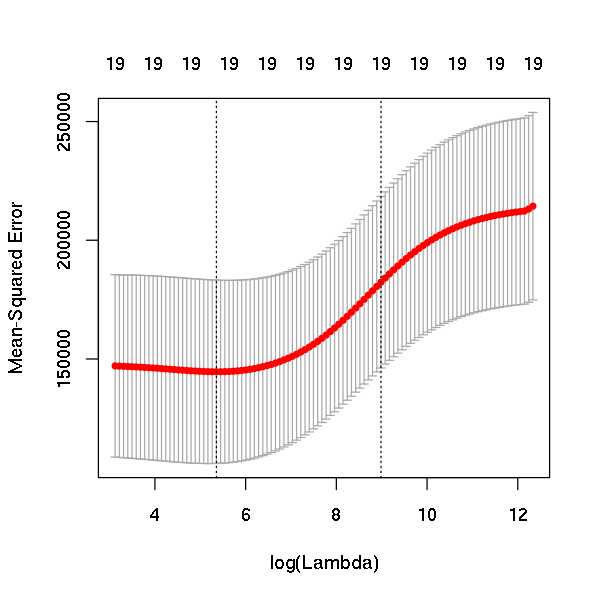

In [33]:
# There is a k-fold cross-validation feature in the glmnet package which we can take advantege of
# 
# By default k=10
set.seed(1)
cv.out<-cv.glmnet(x[train,],y[train],alpha=0)
plot(cv.out)

[1] 211.742

[1] 5.355

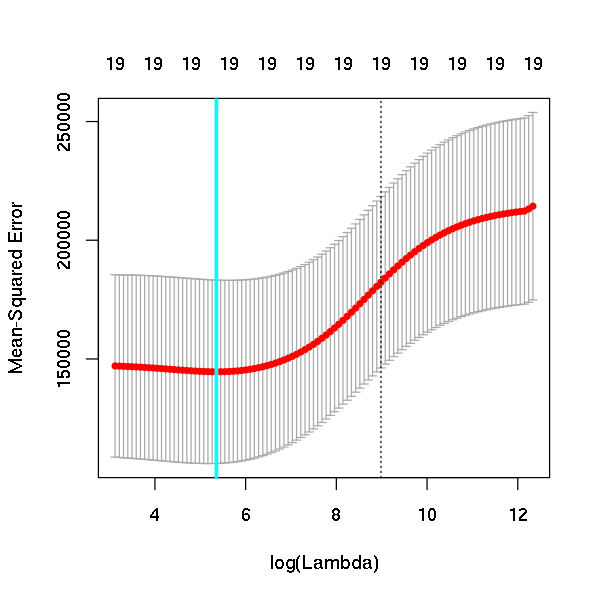

In [34]:
bestlam<-cv.out$lambda.min
round(bestlam,3)
round(log(bestlam),3)
plot(cv.out)
abline(v=log(bestlam),lwd=3,col="cyan")

In [35]:
# Mean quadratic error with the optimal lambda and the full dataset
# 
# Coefficients of this model
#
# We observe that none of these coefficients is zero, hence there is no variable selectioin in ridge regression. 
# To be compared with the lasso below.
ridge.pred<-predict(ridge.mod,s=bestlam,newx=x[test,])
round(mean((ridge.pred-y.test)^2),3)
out<-glmnet(x,y,alpha=0)
round(predict(out,type="coefficients",s=bestlam)[1:20,],3)

[1] 96015.51

(Intercept)       AtBat        Hits       HmRun        Runs         RBI 
      9.885       0.031       1.009       0.139       1.113       0.873 
      Walks       Years      CAtBat       CHits      CHmRun       CRuns 
      1.804       0.131       0.011       0.065       0.452       0.129 
       CRBI      CWalks     LeagueN   DivisionW     PutOuts     Assists 
      0.137       0.029      27.182     -91.634       0.191       0.043 
     Errors  NewLeagueN 
     -1.812       7.212

# A2. Regression with the _Lasso_ 

## Same `Hitters` dataset as above and `glmnet`

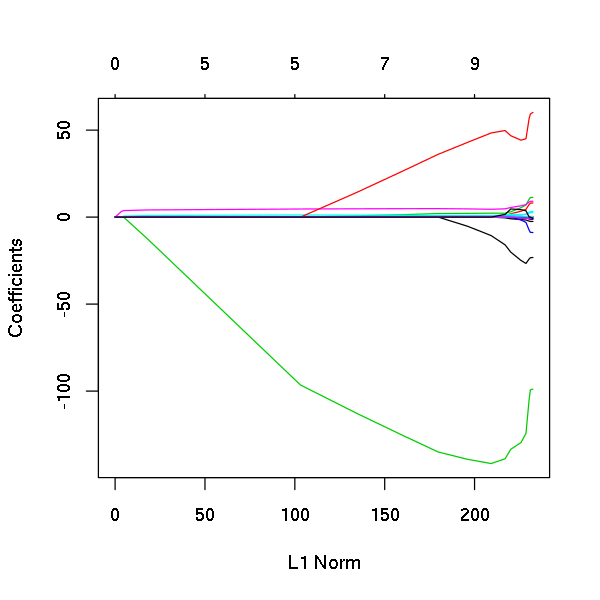

In [36]:
# The same glmnet function performs lasso regression, setting the parameter alpha=1 
#
lasso.mod<-glmnet(x[train,],y[train],alpha=1,lambda=grid)
plot(lasso.mod)

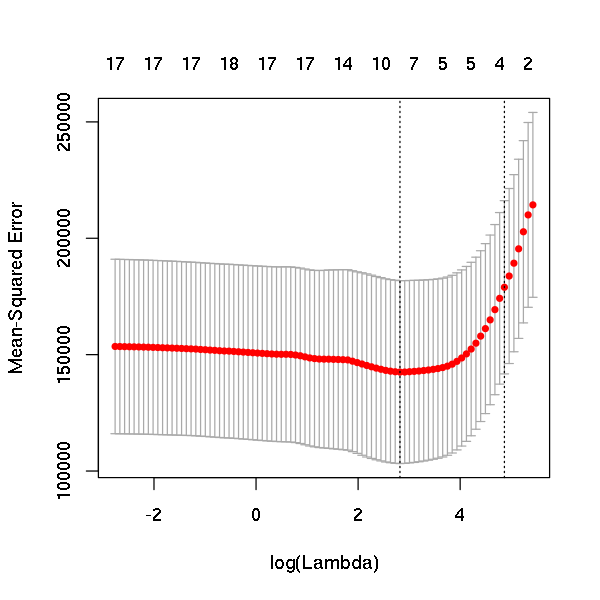

In [37]:
set.seed(1)
cv.out<-cv.glmnet(x[train,],y[train],alpha=1)
plot(cv.out)
bestlam<-cv.out$lambda.min

[1] 16.78

[1] 2.82

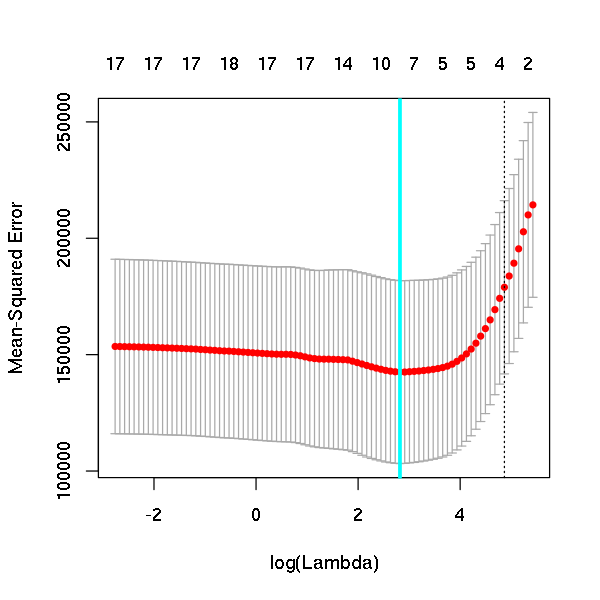

In [38]:
round(bestlam,3)
round(log(bestlam),3)
plot(cv.out)
abline(v=log(bestlam),lwd=3,col="cyan")

In [39]:
# Quadratic error on the test subset with the optimal lambda 
lasso.pred<-predict(lasso.mod,s=bestlam,newx=x[test,])
round(mean((lasso.pred-y.test)^2),3)

[1] 100743.4

### The variable selection feature of the _Lasso_

In [40]:
# Quadratic error on the full dataset with the optimal lambda
# Coefficients in this model:
#
# Now we see there are zero coefficients: this is equivalent to discarding these variables.
#
# Compare with the ridge regression above
#
out<-glmnet(x,y,alpha=1,lambda=grid)
lasso.coef<-predict(out,type="coefficients",s=bestlam)[1:20,]
round(lasso.coef,3)
round(lasso.coef[lasso.coef!=0],3)

(Intercept)       AtBat        Hits       HmRun        Runs         RBI 
     18.539       0.000       1.874       0.000       0.000       0.000 
      Walks       Years      CAtBat       CHits      CHmRun       CRuns 
      2.218       0.000       0.000       0.000       0.000       0.207 
       CRBI      CWalks     LeagueN   DivisionW     PutOuts     Assists 
      0.413       0.000       3.267    -103.485       0.220       0.000 
     Errors  NewLeagueN 
      0.000       0.000

(Intercept)        Hits       Walks       CRuns        CRBI     LeagueN 
     18.539       1.874       2.218       0.207       0.413       3.267 
  DivisionW     PutOuts 
   -103.485       0.220

# B. Orthogonalization methods

## Following  ISLR - Cap 6 - Laboratory 3 - PCR and PLS 

[Codi de la web ISLR](http://www-bcf.usc.edu/~gareth/ISL/Chapter%206%20Labs.txt)

In [ ]:
#install.packages("pls",dependencies=TRUE,repos="https://cloud.r-project.org")
require(pls)

# B1. Principal Components Regression (PCR)

In [ ]:
# Principal Components Regression
set.seed(2)
pcr.fit<-pcr(Salary~., data=Hitters,scale=TRUE,validation="CV")
summary(pcr.fit)

In [ ]:
validationplot(pcr.fit,val.type="MSEP")

In [ ]:
# Cross-validation with hold-out
#
# Training the model, selecting number of principal components included in the model
set.seed(1)
pcr.fit<-pcr(Salary~., data=Hitters,subset=train,scale=TRUE, validation="CV")
validationplot(pcr.fit,val.type="MSEP")

In [ ]:
# The minimum of the graph (optimal number of orthogonal variables) appears at 5 variables (principal components).
# Fit the model for this number
pcr.pred<-predict(pcr.fit,x[test,],ncomp=5)
round(mean((pcr.pred-y.test)^2),3)
pcr.fit<-pcr(y~x,scale=TRUE,ncomp=5)
summary(pcr.fit)

# B2. Partial Least Squares (PLS)

In [ ]:
# Partial Least Squares
set.seed(1)
pls.fit<-plsr(Salary~., data=Hitters,subset=train,scale=TRUE, validation="CV")
summary(pls.fit)

In [ ]:
validationplot(pls.fit,val.type="MSEP")

In [ ]:
# The minimum of the graph (optimal number of orthogonal variables) appears at 2 variables.
# Fit the model for this number
pls.pred<-predict(pls.fit,x[test,],ncomp=2)
round(mean((pls.pred-y.test)^2),3)
pls.fit<-plsr(Salary~., data=Hitters,scale=TRUE,ncomp=2)
summary(pls.fit)

# Homework 1 (Part 2)